## Klinkenberg Effect

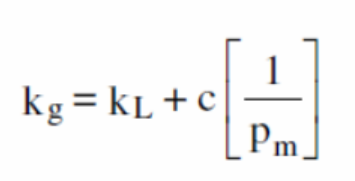

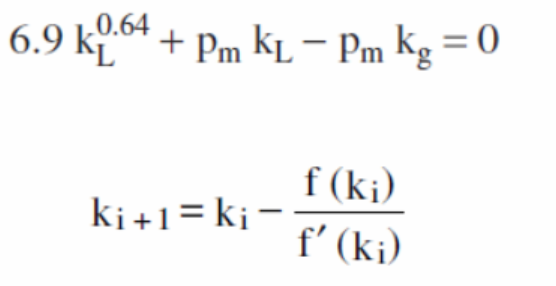

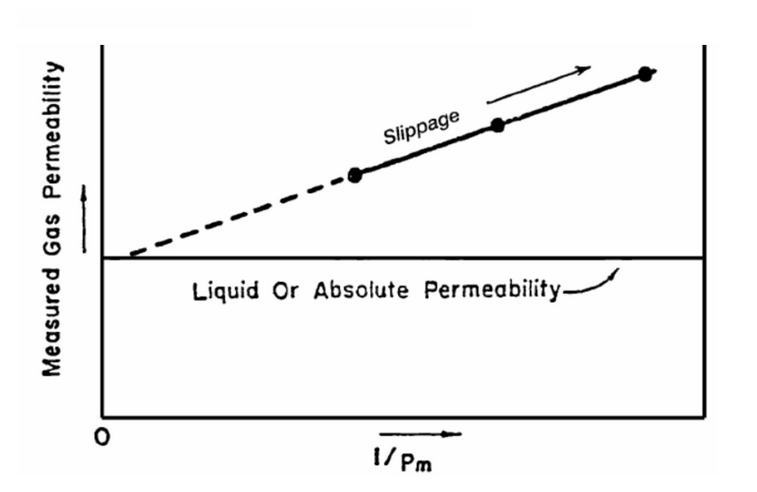

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
kg = float(input("Enter the measured permeability: "))
pm = float(input("Enter the mean pressure across the core: "))
k = float(input("Enter the initial guess of absolute permeability: "))


while (abs(6.9*k**0.64+pm*k - pm*kg)>0.0000000001):
    k = k - ((6.9*k**0.64+pm*k - pm*kg)/(4.416*(k**(-0.36))+pm))
    
print(f"The final value of Perm K is: {k} ")

print(f"The % Error is: {100*abs((k-23.66)/k)}")

Enter the measured permeability: 46.6
Enter the mean pressure across the core: 2.152
Enter the initial guess of absolute permeability: 85
The final value of Perm K is: 22.849002279470838 
The % Error is: 3.5493791396651915


In [2]:
#plt.plot(x,y)

In [3]:
x = [0,1/pm]

In [4]:
x

[0, 0.4646840148698885]

In [5]:
y = [k,kg]

In [6]:
y

[22.849002279470838, 46.6]

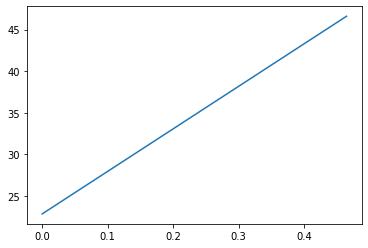

In [9]:
plt.plot(x,y)

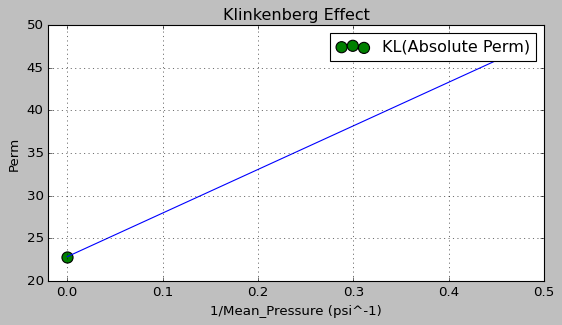

In [16]:
plt.style.use('classic')

plt.figure(figsize=(8,4))

plt.plot(x,y)
plt.scatter(0,k,label="KL(Absolute Perm)",c="green",s=100)
plt.xlabel('1/Mean_Pressure (psi^-1)')
plt.xlim(-0.02,0.5)
plt.ylabel('Perm')

plt.title('Klinkenberg Effect')
plt.legend()
plt.grid(True)

In [23]:
def klinkenberg(kg,pm,k):
    
    """
    This klinkenberg function calculates absolute permeability for given gas permeability at a given mean pressure.
    INPUTS:
    kg=> gas permeability in lab at a given mean pressure pm
    pm => mean pressure
    k=>User initial guess for absolute perm.
    
    return:
    k=> value of absolute permeability
    plots the klinkenberg effect
    
    """
    count = 0

    while (abs(6.9*k**0.64+pm*k - pm*kg)>0.0000000001):
        k = k - ((6.9*k**0.64+pm*k - pm*kg)/(4.416*(k**(-0.36))+pm))
        count=count+1

    print(f"The final value of Perm K is: {k} ")
    print(f"The number of iterations used = {count}")
    
    x=[0,1/pm]
    y=[k,kg]
    
    plt.style.use('classic')

    plt.figure(figsize=(8,4))

    plt.plot(x,y)

    plt.xlabel('1/Mean_Pressure (psi^-1)')
    
    plt.scatter(0,k,label="KL(Absolute Perm)",c="green",s=100)
    
    plt.scatter(1/pm,kg,label="User provided data",c="red",s=100)

    plt.ylabel('Perm')

    plt.title('Klinkenberg Effect')
    
    plt.legend(loc="best")

    plt.grid(True)

    return k

The final value of Perm K is: 6.836502419396808 
The number of iterations used = 4


6.836502419396808

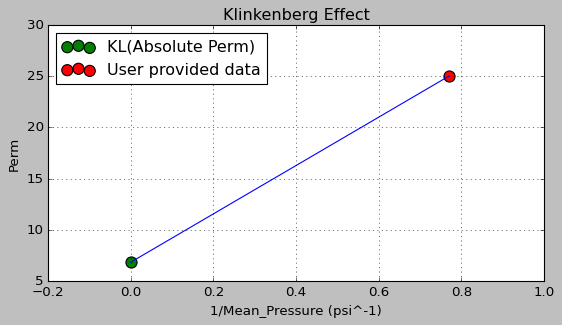

In [24]:
klinkenberg(25,1.3,20)

In [25]:
x,y

([0, 0.4646840148698885], [22.849002279470838, 46.6])

In [27]:
m,c = np.polyfit(x,y,1)

In [28]:
m

51.112147094578745

In [29]:
c

22.84900227947084

In [30]:
x_axis = np.linspace(0,1,500)

In [32]:
y_axis = m*x_axis+c

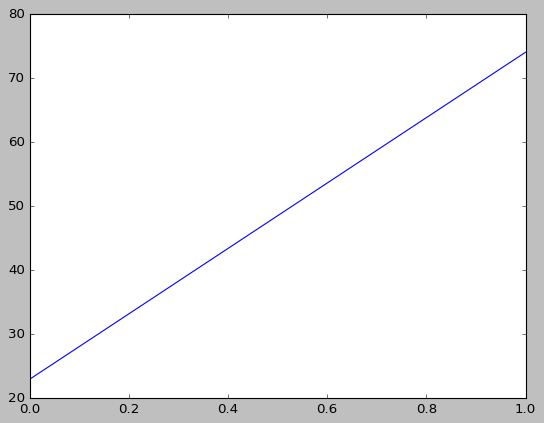

In [34]:
plt.plot(x_axis,y_axis)

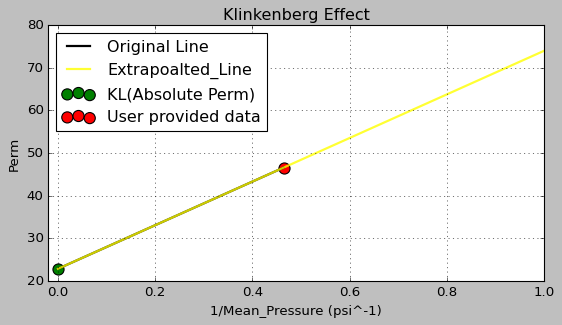

In [44]:
plt.style.use('classic')

plt.figure(figsize=(8,4))

plt.plot(x,y,label="Original Line",c="black",lw=2)
plt.plot(x_axis,y_axis,label="Extrapoalted_Line",alpha=0.8,lw=2,c="yellow")
plt.scatter(0,k,label="KL(Absolute Perm)",c="green",s=100)
plt.xlabel('1/Mean_Pressure (psi^-1)')
plt.xlim(-0.02,1)
plt.ylabel('Perm')
plt.scatter(1/pm,kg,label="User provided data",c="red",s=100)
plt.title('Klinkenberg Effect')
plt.legend(loc="best")
plt.grid(True)

In [45]:
pm_new = 2

In [46]:
kg_new = m*(1/pm_new)+c

In [47]:
kg_new

48.40507582676021

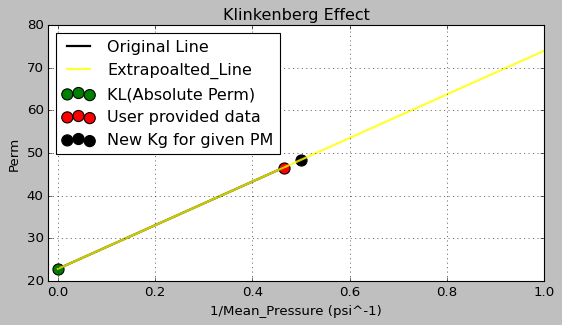

In [48]:
plt.style.use('classic')

plt.figure(figsize=(8,4))

plt.plot(x,y,label="Original Line",c="black",lw=2)
plt.plot(x_axis,y_axis,label="Extrapoalted_Line",alpha=0.8,lw=2,c="yellow")
plt.scatter(0,k,label="KL(Absolute Perm)",c="green",s=100)
plt.xlabel('1/Mean_Pressure (psi^-1)')
plt.xlim(-0.02,1)
plt.ylabel('Perm')
plt.scatter(1/pm,kg,label="User provided data",c="red",s=100)


plt.scatter(1/pm_new,kg_new,label="New Kg for given PM",c="black",s=100)

plt.title('Klinkenberg Effect')
plt.legend(loc="best")
plt.grid(True)

In [49]:
def klinkenberg():
    
    """
    This klinkenberg function calculates absolute permeability for given gas permeability at a given mean pressure.
    INPUTS:
    kg=> gas permeability in lab at a given mean pressure pm
    pm => mean pressure
    k=>User initial guess for absolute perm.
    
    return:
    k=> value of absolute permeability
    kg_new=> new value calculated at new mean pressure
    plots the klinkenberg effect
    
    """
    kg = float(input("Enter the gas permeability(md) measured at mean pressure(pm): ")) 
    pm = float(input("Enter the mean pressure(pm) for the measurement done: ")) 
    k = float(input('Enter the initial guess of absolute Permeability(md): '))
    pm_new = float(input("Enter the mean pressure(pm) on which you want to calculate new gas permeability: ")) 
    
    
    count = 0

    while (abs(6.9*k**0.64+pm*k - pm*kg)>0.0000000001):
        k = k - ((6.9*k**0.64+pm*k - pm*kg)/(4.416*(k**(-0.36))+pm))
        count=count+1

    print(f"The final value of Perm K is: {k} ")
    print(f"The number of iterations used = {count}")
    
    x=[0,1/pm]
    y=[k,kg]
    
    m,c = np.polyfit(x,y,1)
    x_axis = np.linspace(0,1,500)
    y_axis = m*x_axis+c
    
    
    kg_new = m*(1/pm_new)+c
    
    
    
    
    
    plt.style.use('classic')

    plt.figure(figsize=(8,4))

    plt.plot(x,y,label="Original Line",c="black",lw=2)
    plt.plot(x_axis,y_axis,label="Extrapoalted_Line",alpha=0.8,lw=2,c="yellow")

    plt.xlabel('1/Mean_Pressure (psi^-1)')
    plt.xlim(-0.02,1)
    
    plt.scatter(0,k,label="KL(Absolute Perm)",c="green",s=100)
    
    plt.scatter(1/pm,kg,label="User provided data",c="red",s=100)
    
    plt.scatter(1/pm_new,kg_new,label="New Kg for given PM",c="black",s=100)

    plt.ylabel('Perm')

    plt.title('Klinkenberg Effect')
    
    plt.legend(loc="best")

    plt.grid(True)

    return k,kg_new

Enter the gas permeability(md) measured at mean pressure(pm): 45
Enter the mean pressure(pm) for the measurement done: 2.152
Enter the initial guess of absolute Permeability(md): 20
Enter the mean pressure(pm) on which you want to calculate new gas permeability: 2
The final value of Perm K is: 21.891137954309837 
The number of iterations used = 3


(21.891137954309837, 46.75627351547244)

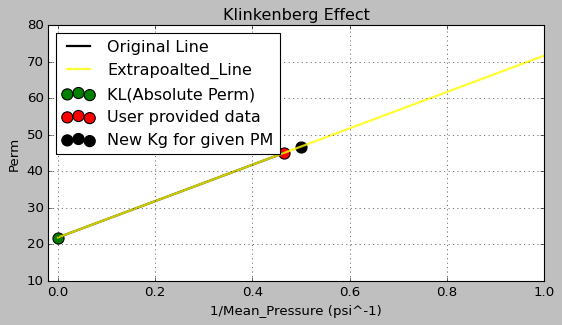

In [50]:
klinkenberg()

## Pressure Profiling

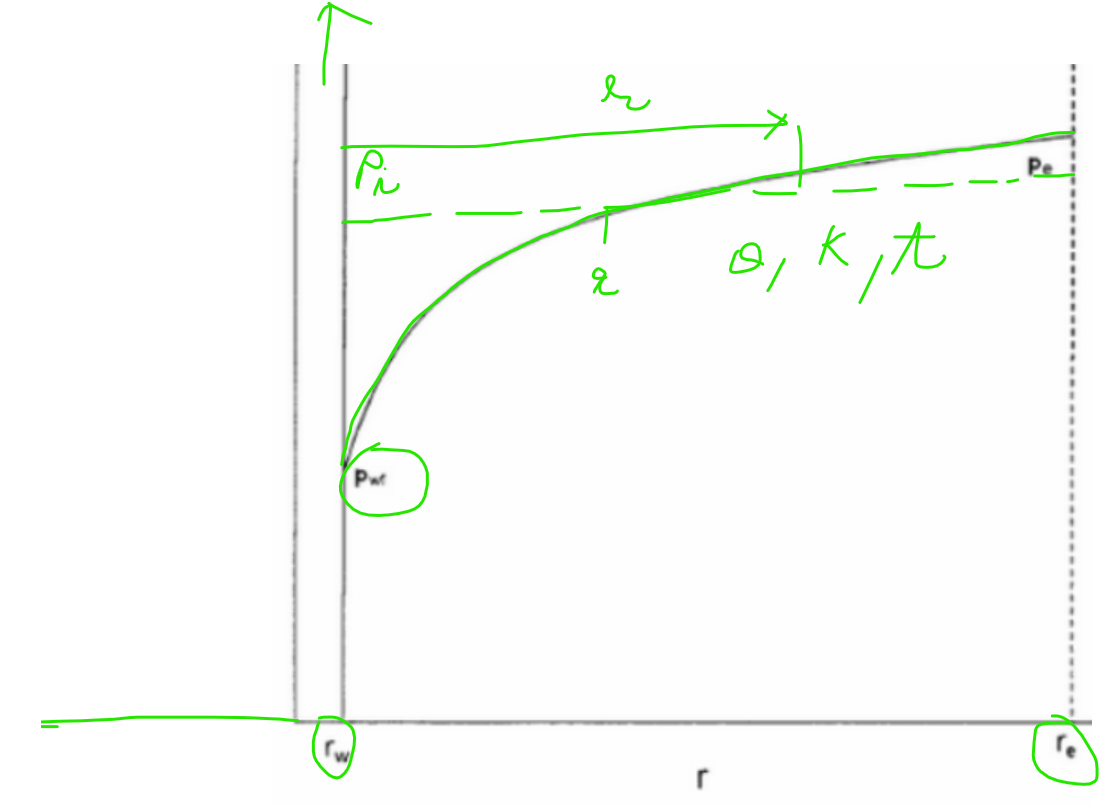

Pr = Pwf + (141.2*q*mu*B*(log(r/rw))/(k*h)

In [52]:
re = float(input('Outer radius of Reservoir(ft): '))
rw = float(input('Wellbore Radius(ft): '))
Pwf = float(input('Bottomhole Pressure(PSI): '))
h = float(input('Net Pay Thickness(ft): '))
k = float(input('Average Reservoir Permeability(mD): '))
q = float(input('Flowrate(STB/Day): '))
mu = float(input('Oil Viscosity: '))
B = 1

Outer radius of Reservoir(ft): 1800
Wellbore Radius(ft): 0.5
Bottomhole Pressure(PSI): 1500
Net Pay Thickness(ft): 60
Average Reservoir Permeability(mD): 150
Flowrate(STB/Day): 200
Oil Viscosity: 15


In [53]:
r = np.linspace(rw,re,500)

In [55]:
pressure = Pwf+(141.2*q*mu*B*(np.log(r/rw))/(k*h))

In [56]:
pressure

array([1500.        , 1599.1058435 , 1628.77345047, 1646.8290728 ,
       1659.84662581, 1670.03283001, 1678.40196398, 1685.50521086,
       1691.67568109, 1697.13015983, 1702.01766534, 1706.44504746,
       1710.49153529, 1714.21750647, 1717.67003078, 1720.88651482,
       1723.89717846, 1726.72678561, 1729.39588333, 1731.92170804,
       1734.31886066, 1736.59981793, 1738.7753255 , 1740.85470403,
       1742.84609053, 1744.75663067, 1746.59263356, 1748.35969743,
       1750.06281255, 1751.70644625, 1753.29461349, 1754.83093595,
       1756.31869179, 1757.76085773, 1759.16014498, 1760.51902982,
       1761.83978006, 1763.12447776, 1764.37503898, 1765.59323099,
       1766.78068726, 1767.93892067, 1769.06933507, 1770.17323552,
       1771.25183733, 1772.30627413, 1773.33760504, 1774.34682101,
       1775.33485059, 1776.30256505, 1777.250783  , 1778.18027454,
       1779.09176502, 1779.98593846, 1780.8634406 , 1781.72488174,
       1782.57083926, 1783.40185994, 1784.21846213, 1785.02113

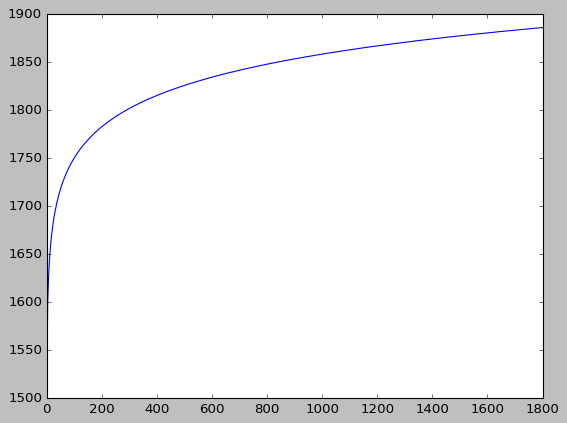

In [57]:
plt.plot(r,pressure)

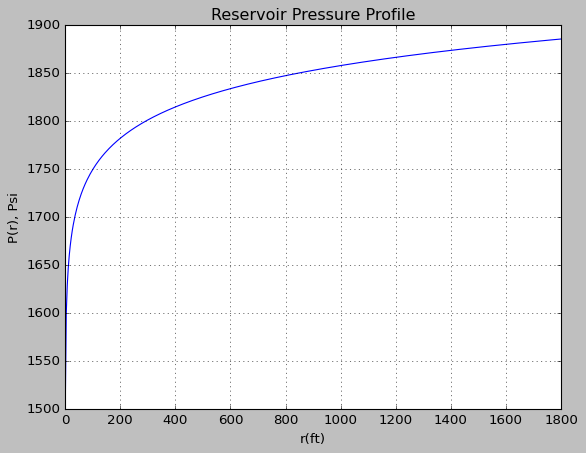

In [59]:
plt.figure(figsize = [8,6])
plt.plot(r,pressure)
plt.xlabel('r(ft)')
plt.ylabel('P(r), Psi')
plt.title('Reservoir Pressure Profile')
plt.grid(True)

In [60]:
def pressureprof():
    re = float(input('Outer radius of Reservoir(ft): '))
    rw = float(input('Wellbore Radius(ft): '))
    Pwf = float(input('Bottomhole Pressure(PSI): '))
    h = float(input('Net Pay Thickness(ft): '))
    k = float(input('Average Reservoir Permeability(mD): '))
    q = float(input('Flowrate(STB/Day): '))
    mu = float(input('Oil Viscosity: '))
    B = 1
    r = np.linspace(rw,re,500)
    pressure = Pwf+(141.2*q*mu*B*(np.log(r/rw))/(k*h))
    
    plt.figure(figsize = [8,6])
    plt.plot(r,pressure)
    plt.xlabel('r(ft)')
    plt.ylabel('P(r), Psi')
    plt.title('Reservoir Pressure Profile')
    plt.grid(True)
    

Outer radius of Reservoir(ft): 1800
Wellbore Radius(ft): 0.25
Bottomhole Pressure(PSI): 1800
Net Pay Thickness(ft): 50
Average Reservoir Permeability(mD): 200
Flowrate(STB/Day): 200
Oil Viscosity: 15


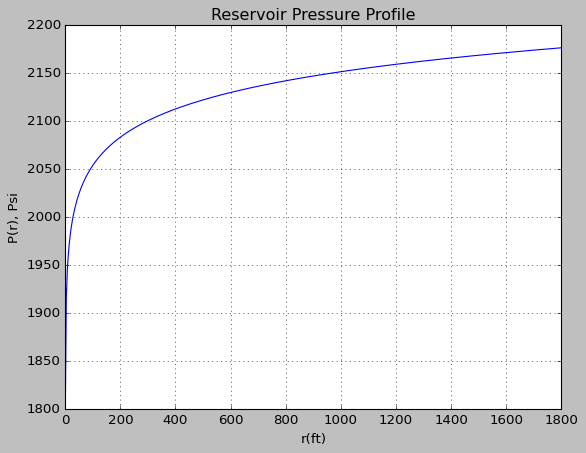

In [61]:
pressureprof()

# Dynamic Plotting

- Visulaization of effect of viscosity, flowrate and permeability on pressure profile

In [62]:
from ipywidgets import interactive

In [63]:
from IPython.display import display

In [86]:
def flowprofile(k,mu,q):
    
    re = 3000
    rw = 0.5
    Pe = 4000
    h = 60
    B = 1
    
    r = np.linspace(rw,re,500)
    pressure = Pe - (141.2*q*mu*B*(np.log(re/r))/(k*h))
    
    
    y_min = pressure[np.where(r==rw)]
    plt.figure(figsize=(8,6))
    plt.plot(r,pressure,lw=4)
    plt.axhline(y_min,lw=3,color="red")
    
    plt.ylim(0,5000)
    
    plt.xlabel('r(ft)')
    plt.ylabel('P(r), PSI')
    
    plt.title("Reservoir Pressure Profile")
    plt.grid(True)
    return r,pressure
    

In [87]:
interactive_flow_profile = interactive(flowprofile,k=(20,1000),mu=(5,15),q=(100,2000))

In [88]:
display(interactive_flow_profile)

interactive(children=(IntSlider(value=510, description='k', max=1000, min=20), IntSlider(value=10, description…

x^2+y^2 = r^2

In [89]:
r = 5
x_cen = 0 
y_cen = 0 


In [90]:
x = np.linspace(-5,5,1000)

In [91]:
y = (25-x**2)**0.5

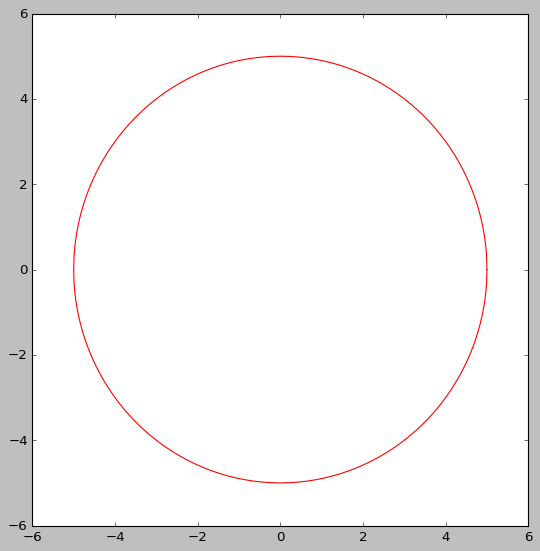

In [97]:
plt.figure(figsize=(8,8))
plt.plot(x,y,color="red")
plt.plot(x,-y,color="red")

In [107]:
def circle(r):
    x = np.linspace(-r,r,1000)
    y_p = (r**2-x**2)**0.5
    y_n = -y_p
    
    plt.figure(figsize = (8,8))
    plt.plot(x,y_p,color = 'red')
    plt.plot(x,y_n,color ='red')
    
    plt.xlim(-10,10)
    plt.ylim(-10,10)
    
    plt.grid(True)
    
    plt.title(f"Circle of radius {r}")
    plt.show()
    
    return x, y_p,y_n

In [108]:
circle_interactive = interactive(circle,r=(1,10))

In [109]:
display(circle_interactive)

interactive(children=(IntSlider(value=5, description='r', max=10, min=1), Output()), _dom_classes=('widget-int…